In [7]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.table import Table
from astropy import units as u
import astropy.constants
from astropy.io import ascii,fits


from telfit import TelluricFitter, DataStructures
from telfit import Modeler


from scipy.optimize import curve_fit
from astropy import  convolution


DEIMOS_DROPBOX = '/Users/tac1998/thesis/'
# change below once we have data
#DEIMOS_REDUX = '/Users/mgeha/Projects/DEIMOS/'
#_SPEED_OF_LIGHT =astropy.constants.c.to_value('km/s') 

In [8]:
# RUN TELFIT SOFTWARE
# INSTALLED FROM https://github.com/freddavies/Telluric-Fitter-py3
def run_telfit(h2o,o2,wave_deimos):
    
    # HARDWIRE TO MAUNA KEA
    alt = 4.2
    lat = 19.8

    # START/END WAVELENGTH IN NM
    wavestart = 620.0
    waveend = 950.0

       
    #GENERATE A TELLURIC SPECTRUM -- DEFAULT RESOLUTION 0.001AA
    modeler = Modeler()
    print(h2o,o2)
    model = modeler.MakeModel(humidity=h2o,o2=o2,
                          lowfreq=1e7/waveend,
                          highfreq=1e7/wavestart, lat=lat, alt=alt)

    tell = model.toarray()

    # CONVERT TO ANGSTRUM
    wave = 10. * tell[:,0]
    flux = tell[:,1]
    
    # DETERMINE BINNING
    bins = wave - np.roll(wave,1) 
    print('binning = ',np.median(bins))
    
    
    # SMOOTH AND REBIN TO LINEAR 0.01A PIXELS
    sig_res = 0.01/np.median(bins)
    print('Kernal ',sig_res)
    gauss_kernel = convolution.Gaussian1DKernel(sig_res)
    smooth_flux  = convolution.convolve(flux, gauss_kernel)

    tell_flux = np.interp(wave_deimos,wave,smooth_flux)

    plt.plot(wave,flux)
    plt.plot(wave_deimos,tell_flux)
    plt.xlim(6900,6910)
    
    return tell_flux

In [9]:
# GRID OF PARAMETERS
h2o_grid = 1.*np.arange(15,95,10)
o2_grid  = 1.e5 * np.arange(0.8, 2.4,0.1)


In [10]:
# READ IN PHOENIX LINEAR WAVELENGTH GRID AND USE IT!
fwave = DEIMOS_DROPBOX + 'WAVE_PHOENIX-ACES-AGSS-COND-2011.fits' 
fhdu  = fits.open(fwave)
wave  = fhdu[0].data
fhdu.info()

mdeimos = (wave >= 6200) & (wave <= 9500)
wave_deimos = wave[mdeimos]


Filename: /Users/tac1998/thesis/WAVE_PHOENIX-ACES-AGSS-COND-2011.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       8   (1569128,)   float64   


15.0 80000.0
binning =  0.00169478655607
Kernal  5.90044803233
/Users/tac1998/thesis//tellurics/telluric_0.01A_h2o_15_o2_0.80_.dat
15.0 90000.0
binning =  0.00169478655607
Kernal  5.90044803233
/Users/tac1998/thesis//tellurics/telluric_0.01A_h2o_15_o2_0.90_.dat
15.0 100000.0
binning =  0.00169478655607
Kernal  5.90044803233
/Users/tac1998/thesis//tellurics/telluric_0.01A_h2o_15_o2_1.00_.dat
15.0 110000.0
binning =  0.00169478655607
Kernal  5.90044803233
/Users/tac1998/thesis//tellurics/telluric_0.01A_h2o_15_o2_1.10_.dat
15.0 120000.0
binning =  0.00169478655607
Kernal  5.90044803233
/Users/tac1998/thesis//tellurics/telluric_0.01A_h2o_15_o2_1.20_.dat
15.0 130000.0
binning =  0.00169478655607
Kernal  5.90044803233
/Users/tac1998/thesis//tellurics/telluric_0.01A_h2o_15_o2_1.30_.dat
15.0 140000.0
binning =  0.00169478655607
Kernal  5.90044803233
/Users/tac1998/thesis//tellurics/telluric_0.01A_h2o_15_o2_1.40_.dat
15.0 150000.0
binning =  0.00169478655607
Kernal  5.90044803233
/Users/tac1998

/Users/tac1998/thesis//tellurics/telluric_0.01A_h2o_45_o2_2.20_.dat
45.0 230000.0
binning =  0.00171374639649
Kernal  5.83516908948
/Users/tac1998/thesis//tellurics/telluric_0.01A_h2o_45_o2_2.30_.dat
55.0 80000.0
binning =  0.00164640389539
Kernal  6.07384374392
/Users/tac1998/thesis//tellurics/telluric_0.01A_h2o_55_o2_0.80_.dat
55.0 90000.0
binning =  0.00164640389539
Kernal  6.07384374392
/Users/tac1998/thesis//tellurics/telluric_0.01A_h2o_55_o2_0.90_.dat
55.0 100000.0
binning =  0.00164640389539
Kernal  6.07384374392
/Users/tac1998/thesis//tellurics/telluric_0.01A_h2o_55_o2_1.00_.dat
55.0 110000.0
binning =  0.00164640389539
Kernal  6.07384374392
/Users/tac1998/thesis//tellurics/telluric_0.01A_h2o_55_o2_1.10_.dat
55.0 120000.0
binning =  0.00164640389539
Kernal  6.07384374392
/Users/tac1998/thesis//tellurics/telluric_0.01A_h2o_55_o2_1.20_.dat
55.0 130000.0
binning =  0.00164640389539
Kernal  6.07384374392
/Users/tac1998/thesis//tellurics/telluric_0.01A_h2o_55_o2_1.30_.dat
55.0 14000

85.0 210000.0
binning =  0.00165231009032
Kernal  6.05213274347
/Users/tac1998/thesis//tellurics/telluric_0.01A_h2o_85_o2_2.10_.dat
85.0 220000.0
binning =  0.00165231009032
Kernal  6.05213274347
/Users/tac1998/thesis//tellurics/telluric_0.01A_h2o_85_o2_2.20_.dat
85.0 230000.0
binning =  0.00165231009032
Kernal  6.05213274347
/Users/tac1998/thesis//tellurics/telluric_0.01A_h2o_85_o2_2.30_.dat


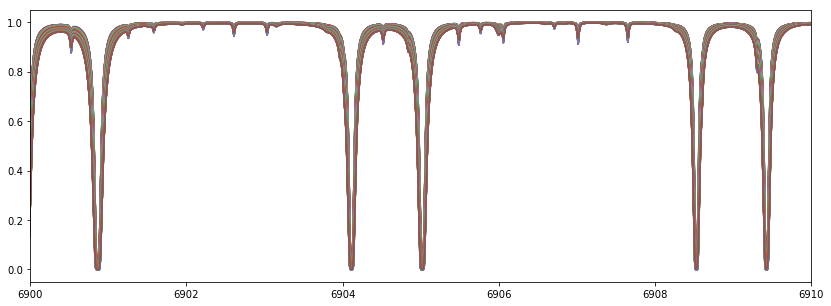

In [13]:
plt.figure(figsize=(14,5))

for h2o in h2o_grid:
    for o2 in o2_grid:

        # EXTRA '_' for reading purposes
        outname = DEIMOS_DROPBOX + '/tellurics/telluric_0.01A_h2o_{}_o2_{:2.2f}_.dat'.format(int(h2o),o2/1.e5)

        twave = wave_deimos
        if not os.path.isfile(outname):
            tflux = run_telfit(h2o,o2, wave_deimos)
            print(outname)

            outfile = open(outname,'w')
            outfile.write('wave flux\n')
            outfile.write('# {} {} \n'.format(h2o,o2))
            for w,f in zip(twave, tflux):
                outfile.write('{:0.6f} {:0.6f}\n'.format(w,f))
            outfile.close()
